<a href="https://colab.research.google.com/gist/manojkumark04/3aea390869ac779d4fe3e062f18909a3/customer_conversion_prediction_manojkumar_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime, timedelta
from scipy.stats import zscore
from scipy.stats import iqr 

In [7]:
df = pd.read_csv("/content/drive/MyDrive/FINAL PROJECTS/Customer_Conversion_Prediction_train.csv")

In [8]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [9]:
cols = df.columns.to_list()
cols

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome',
 'y']

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [11]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [12]:
df.shape

(45211, 11)

In [13]:
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [14]:
df = df.drop(df[df.duplicated()].index)

In [15]:
df.shape

(45205, 11)

# age column data cleaning

In [16]:
(df["age"].value_counts())

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [17]:
df["age"].isnull().sum()

0

# job column data cleaning

In [18]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [19]:
(df["job"].value_counts())

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

# Filling missing job column value with mode

In [20]:
df["job"] = df["job"].replace("unknown", df["job"].value_counts().index[0])

In [21]:
df["marital"].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [22]:
df["marital"].isnull().sum()

0

# education_qual column data cleaning

In [23]:
df["education_qual"].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

# Filling missing education_qual column values with mode

In [24]:
df["education_qual"] = df["education_qual"].replace("unknown", df["education_qual"].value_counts().index[0])

In [25]:
df["education_qual"].isnull().sum()

0

# call_type  column data cleaning 

In [26]:
df["call_type"].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [27]:
df["call_type"].isnull().sum()

0

# day column data cleaning 

In [28]:
df["day"].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [29]:
df["day"].isnull().sum()

0

# mon column data cleaning 

In [30]:
df["mon"].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [31]:
df["mon"].isnull().sum()

0

# prev_outcome column data cleaning 

In [32]:
df["prev_outcome"].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [33]:
df["prev_outcome"].isnull().sum()

0

# target column data cleaning

In [34]:
df["y"].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [35]:
df["y"].isnull().sum()

0

In [36]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [37]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


# EDA

In [39]:
df["target"] = df["y"].map({"yes":1, "no":0})

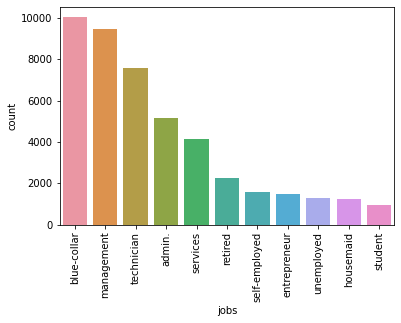

In [40]:
df_job = pd.DataFrame(df.job.value_counts()).sort_values("job", ascending = False).reset_index()
df_job.rename(columns = {"index":"jobs","job" : "count"}, inplace = True)
bar = sns.barplot(x = df_job["jobs"], y =df_job["count"], data = df_job)
bar.tick_params(axis = "x", rotation = 90)

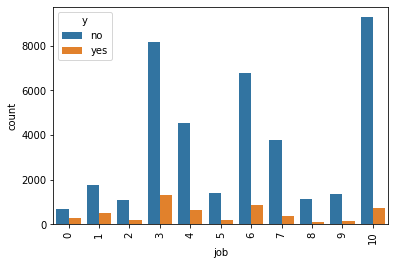

In [67]:
job = sns.countplot(data=df, x = "job", hue = "y")
job.tick_params(axis = "x", rotation = 90)


# target encoding job column

<AxesSubplot:ylabel='job'>

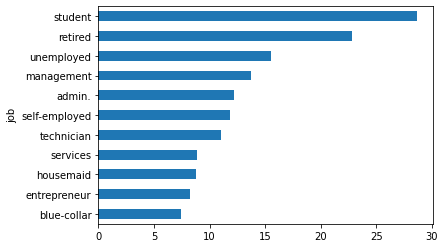

In [43]:
(df.groupby("job")["target"].mean()*100).sort_values().plot(kind = "barh") # subscribed % of job people

In [45]:
df["job"] = df["job"].replace({"student":0,"retired":1,"unemployed":2, "management":3, "admin.":4, "self-employed":5,"technician":6,"services":7, "housemaid":8,"entrepreneur":9,"blue-collar":10})

In [46]:
df["job"]

0         3
1         6
2         9
3        10
4        10
         ..
45206     6
45207     1
45208     1
45209    10
45210     9
Name: job, Length: 45205, dtype: int64

# target encoding marital column

<AxesSubplot:ylabel='marital'>

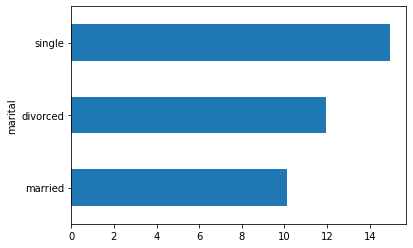

In [47]:
(df.groupby("marital")["target"].mean()*100).sort_values().plot(kind = "barh")

In [48]:
df["marital"] = df["marital"].replace({"single":0, "divorced":1, "married":2})

# target encoding education_qual column

<AxesSubplot:ylabel='education_qual'>

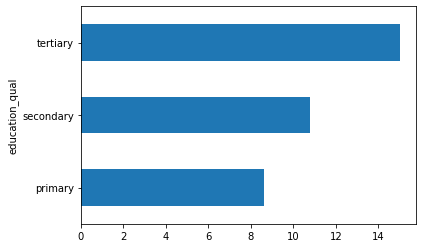

In [49]:
(df.groupby("education_qual")["target"].mean()*100).sort_values().plot(kind = "barh")

In [50]:
df["education_qual"] = df["education_qual"].replace({"tertiary":0,"secondary":1,"primary":2})

# target encoding call_type column

In [51]:
df["call_type"].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

<AxesSubplot:ylabel='call_type'>

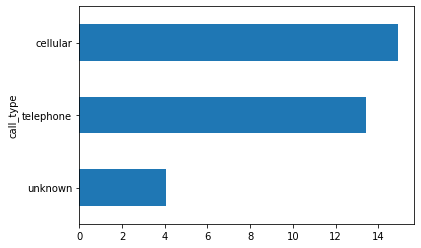

In [52]:
(df.groupby("call_type")["target"].mean()*100).sort_values().plot(kind = "barh")

In [53]:
df["call_type"] = df["call_type"].replace({"cellular":0,"telephone":1,"unknown":2})

In [54]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,3,2,0,2,5,may,261,1,unknown,no,0
1,44,6,0,1,2,5,may,151,1,unknown,no,0
2,33,9,2,1,2,5,may,76,1,unknown,no,0
3,47,10,2,1,2,5,may,92,1,unknown,no,0
4,33,10,0,1,2,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,6,2,0,0,17,nov,977,3,unknown,yes,1
45207,71,1,1,2,0,17,nov,456,2,unknown,yes,1
45208,72,1,2,1,0,17,nov,1127,5,success,yes,1
45209,57,10,2,1,1,17,nov,508,4,unknown,no,0


# target encoding prev_outcome column

In [55]:
df["prev_outcome"].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

<AxesSubplot:ylabel='prev_outcome'>

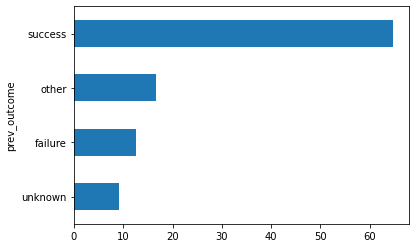

In [56]:
(df.groupby("prev_outcome")["target"].mean()*100).sort_values().plot(kind = "barh")

In [57]:
df["prev_outcome"] = df["prev_outcome"].replace({"success":0,"other":1,"failure":2,"unknown":3})

# target encoding day column

<AxesSubplot:ylabel='day'>

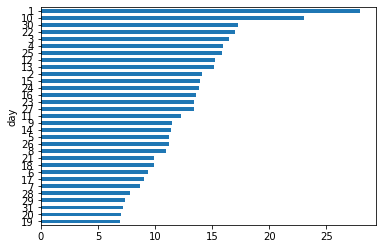

In [58]:
(df.groupby("day")["target"].mean()*100).sort_values().plot(kind = "barh")

In [59]:
df["day"] = df["day"].replace({1:0, 10:1,30:2,22:3,3:4,4:5,25:6,12:7,13:8,2:9,15:10,24:11,16:12,23:13,27:14,11:15,9:16,14:17,5:18,26:19,8:20,21:21,18:22,6:23,17:24,7:25,28:26,29:27,31:28,20:29,19:30})

# target encoding mon column

In [60]:
df["mon"].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

<AxesSubplot:ylabel='mon'>

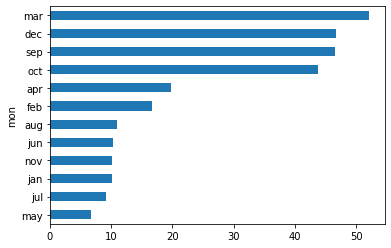

In [61]:
(df.groupby("mon")["target"].mean()*100).sort_values().plot(kind = "barh")

In [62]:
df["mon"] = df["mon"].replace({"mar":0,"dec":1,"sep":2,"oct":3,"apr":4,"feb":5,"aug":6,"jun":7,"nov":8,"jan":9,"jul":10,"may":11})

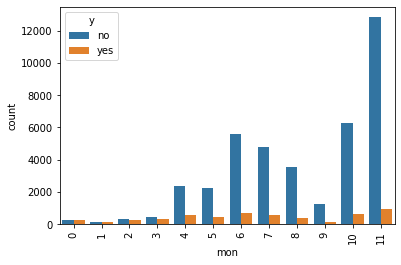

In [66]:
day = sns.countplot(data=df, x="mon", hue="y")
day.tick_params(axis="x", rotation=90)

<AxesSubplot:xlabel='y', ylabel='age'>

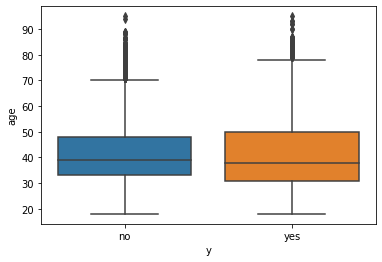

In [69]:
sns.boxplot(data = df, x = "y", y = "age")

<AxesSubplot:xlabel='dur', ylabel='Count'>

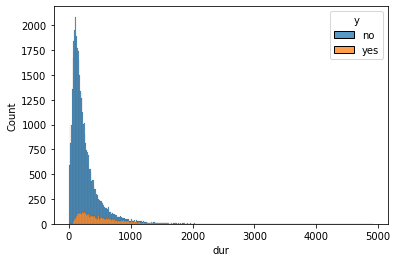

In [70]:
import seaborn as sns
sns.histplot(data=df, x="dur", hue="y", multiple="stack")


Text(0, 0.5, 'mean duration')

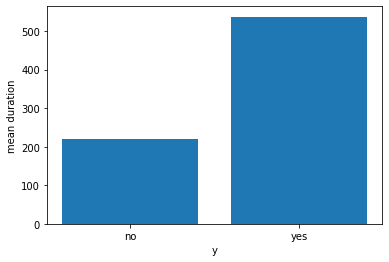

In [71]:
import matplotlib.pyplot as plt
grouped_data = df.groupby('y')['dur'].mean()
plt.bar(x=grouped_data.index, height=grouped_data.values)
plt.xlabel('y')
plt.ylabel('mean duration')

<AxesSubplot:xlabel='y', ylabel='day'>

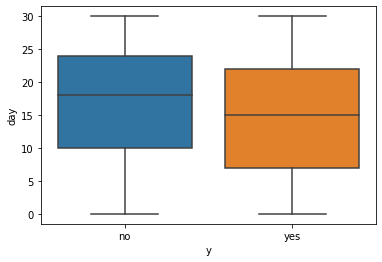

In [73]:
sns.boxplot(data = df, x = "y", y = "day")

In [74]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,3,2,0,2,18,11,261,1,3,no,0
1,44,6,0,1,2,18,11,151,1,3,no,0
2,33,9,2,1,2,18,11,76,1,3,no,0
3,47,10,2,1,2,18,11,92,1,3,no,0
4,33,10,0,1,2,18,11,198,1,3,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,6,2,0,0,24,8,977,3,3,yes,1
45207,71,1,1,2,0,24,8,456,2,3,yes,1
45208,72,1,2,1,0,24,8,1127,5,0,yes,1
45209,57,10,2,1,1,24,8,508,4,3,no,0


In [75]:
df.corr()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
age,1.000000,-0.097369,0.376110,0.164885,0.026262,0.008424,-0.110645,-0.004698,0.004751,-0.012204,0.025126
job,-0.097369,1.000000,0.125127,0.404557,0.143050,0.038094,0.176022,-0.002256,0.026054,0.075029,-0.118438
marital,0.376110,0.125127,1.000000,0.161119,0.040763,0.032792,0.001519,-0.022908,0.029146,0.037144,-0.065673
education_qual,0.164885,0.404557,0.161119,1.000000,0.153952,0.011187,0.105310,-0.002653,-0.003729,0.050750,-0.068640
call_type,0.026262,0.143050,0.040763,0.153952,1.000000,0.015544,0.303790,-0.020817,0.019592,0.251073,-0.148391
day,0.008424,0.038094,0.032792,0.011187,0.015544,1.000000,0.044642,-0.036998,0.057117,0.082331,-0.108116
mon,-0.110645,0.176022,0.001519,0.105310,0.303790,0.044642,1.000000,-0.000273,0.007567,0.168904,-0.204187
dur,-0.004698,-0.002256,-0.022908,-0.002653,-0.020817,-0.036998,-0.000273,1.000000,-0.084582,-0.023161,0.394506
num_calls,0.004751,0.026054,0.029146,-0.003729,0.019592,0.057117,0.007567,-0.084582,1.000000,0.094992,-0.073180
prev_outcome,-0.012204,0.075029,0.037144,0.050750,0.251073,0.082331,0.168904,-0.023161,0.094992,1.000000,-0.259300


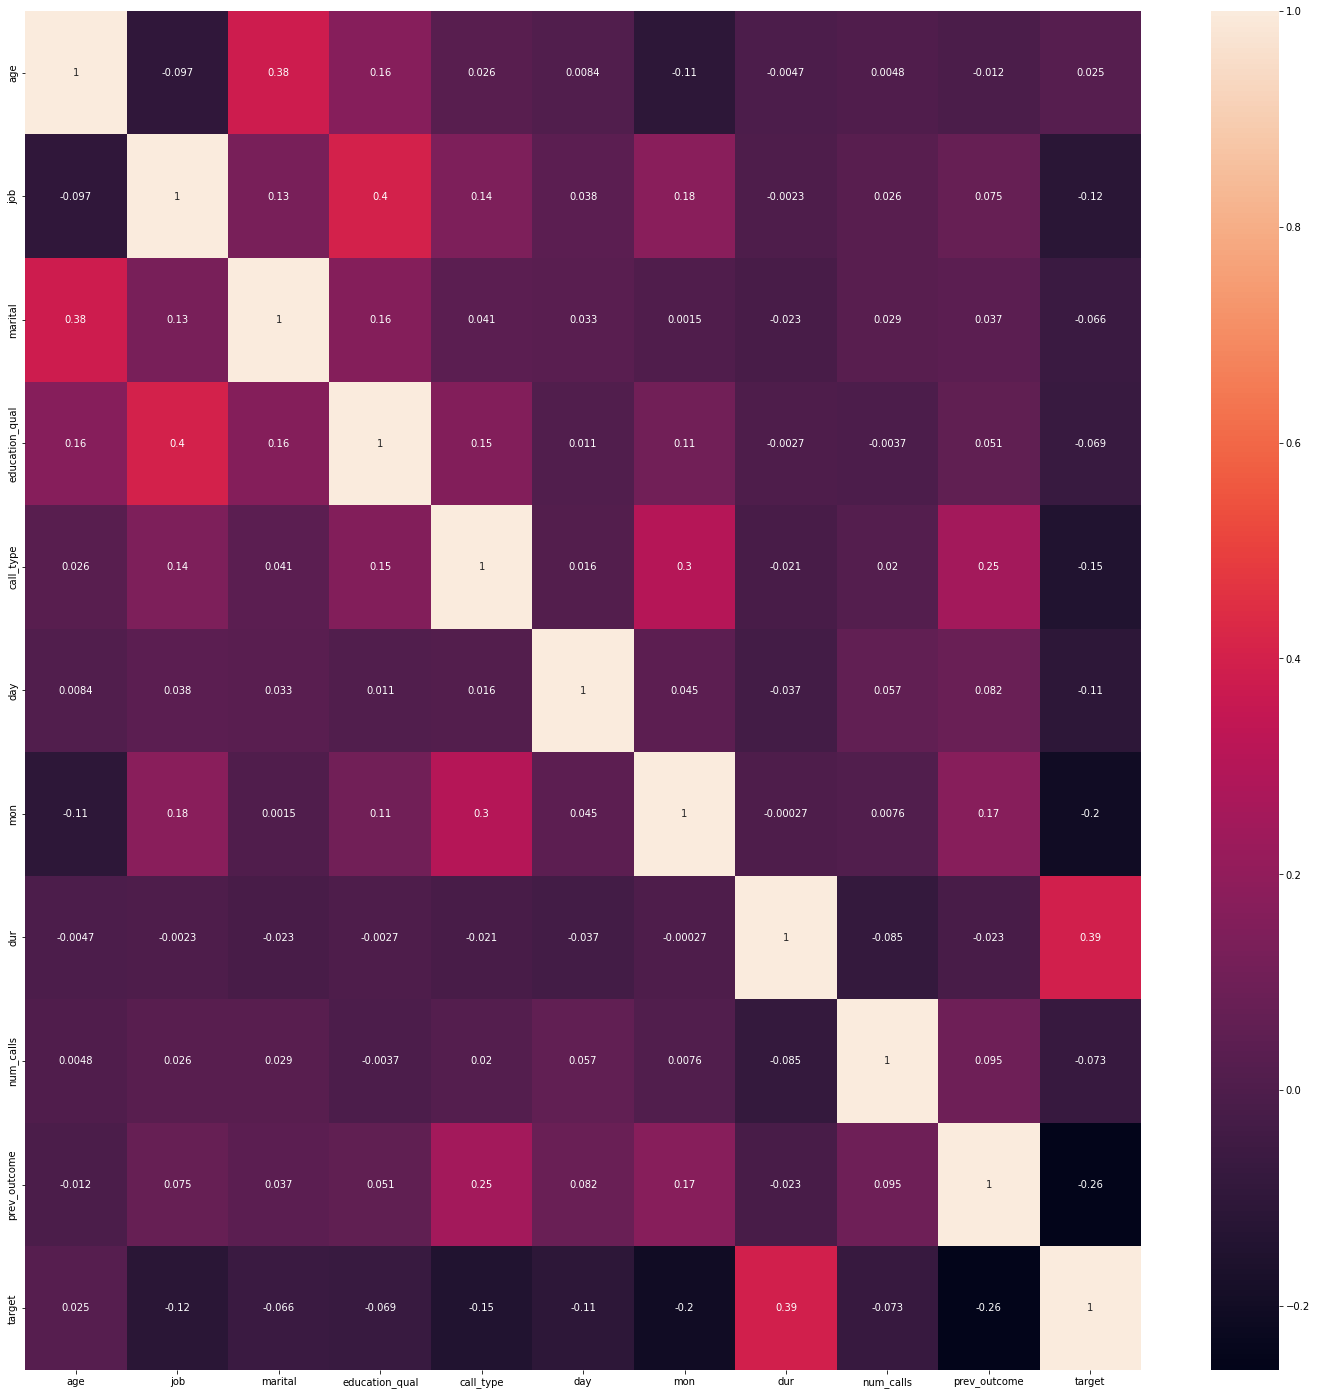

In [76]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

# encoding data

In [77]:
df.dtypes

age                int64
job                int64
marital            int64
education_qual     int64
call_type          int64
day                int64
mon                int64
dur                int64
num_calls          int64
prev_outcome       int64
y                 object
target             int64
dtype: object

# Split data into training and testing sets

In [78]:
X = df.drop(['target',"y"], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
len(X_train),len(y_train)


(36164, 36164)

In [80]:
len(X_test), len(y_test)

(9041, 9041)

# Scaling the data

In [81]:
#  Scale numerical features
scaler = StandardScaler()
num_cols = ['age','job', 'marital', 'education_qual',"num_calls", "dur",'call_type', 'prev_outcome',"day", "mon"]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Balancing target Data

In [82]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy = "all")
X_train, y_train = smt.fit_resample(X_train, y_train)

In [83]:
len(X_train),len(y_train)


(56420, 56420)

In [84]:
len(X_test), len(y_test)

(9041, 9041)

In [85]:
import warnings
warnings.filterwarnings("ignore")

# Training models

In [86]:
models = [
('Logistic Regression', LogisticRegression()),
('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
('Random Forest Classifier', RandomForestClassifier(random_state=42)),
('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=42)),
('K-Nearest Neighbors Classifier', KNeighborsClassifier()),
('XGBoost Classifier', XGBClassifier())
]


# evaluating performance

In [87]:
train_scores = []
test_scores = []
for name, model in models:
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_scores.append(roc_auc_score(y_train, train_pred))
    test_pred = model.predict(X_test)
    test_scores.append(roc_auc_score(y_test, test_pred))
    y_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    print(f'{name} AUC: {auc_score:.3f}')

Logistic Regression AUC: 0.896
Decision Tree Classifier AUC: 0.806
Random Forest Classifier AUC: 0.920
Gradient Boosting Classifier AUC: 0.910
K-Nearest Neighbors Classifier AUC: 0.848
XGBoost Classifier AUC: 0.925


# Voting classifier algorithm


In [88]:
model_1 = LogisticRegression(random_state = 42)
model_2 = DecisionTreeClassifier(random_state = 42)
model_3 = KNeighborsClassifier(5)
model_4 = XGBClassifier(learning_rate = 0.75, n_estimators = 100, verbosity = 0)
model_5 = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = "sqrt")
voting_model = VotingClassifier(estimators = [("lr",model_1),("dt", model_2), ("knn", model_3), ("xgb", model_4), ("rf", model_5)], voting = "soft")

In [89]:
voting_model.fit(X_train, y_train)
voting_model_y_pred = voting_model.predict(X_test)
voting_model_AUROC = roc_auc_score(y_test, voting_model.predict_proba(X_test)[:,1])

In [90]:
voting_model_AUROC

0.9170632922528078

In [91]:
from sklearn.model_selection import learning_curve

# Define the function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt


In [ ]:

# Define the estimator and data
estimator = XGBClassifier()
X, y = df.drop(['target','y'], axis=1), df['target']

# Plot the learning curve
plot_learning_curve(estimator, 'Learning Curve (XGBoost)', X, y, ylim=(0.7, 1.01), cv=5, n_jobs=-1)


# Finding important features

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get feature importance
coefficients = pd.DataFrame({'feature':  X_train.columns, 'importance': abs(logreg.coef_[0])*100})
coefficients = coefficients.sort_values('importance', ascending=False)
print(coefficients)

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Get feature importance for classification model
coefficients_classifier = pd.DataFrame({'feature': X_train.columns, 'importance': dt_classifier.feature_importances_*100})
coefficients_classifier = coefficients_classifier.sort_values('importance', ascending=False)
print(coefficients_classifier)

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Get the feature importances
importances = rf_classifier.feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, importances):
    print(feature, ": ", importance*100)

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Get the feature importances
importances = gb.feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, importances):
    print(feature, ": ", importance*100)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Get the feature importances
importances = [1/k for k in knn.kneighbors(X_train)[0].sum(axis=1)]

# Print the feature importances
for feature, importance in zip(X.columns, importances):
    print(feature, ": ", importance*10)


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Get the feature importances
importances = xgb.feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, importances):
    print(feature, ": ", importance*100)


# From the model feature importance dur has highest influence on customer conversion